In [3]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def func(pth):
    for p in os.listdir(pth):
        img_pth = os.path.join(pth,p)
        large = cv2.imread(img_pth)
        rgb = cv2.pyrDown(large)
        small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
        grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

        _, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
        connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
        # using RETR_EXTERNAL instead of RETR_CCOMP
        contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        #For opencv 3+ comment the previous line and uncomment the following line
        #_, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        mask = np.zeros(bw.shape, dtype=np.uint8)

        for idx in range(len(contours)):
            x, y, w, h = cv2.boundingRect(contours[idx])
            mask[y:y+h, x:x+w] = 0
            cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
            r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

            if r > 0.45 and w > 8 and h > 8:
                cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

        plt.imshow(rgb)
        plt.show()

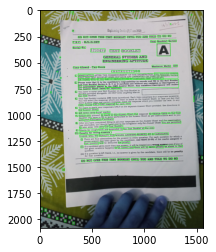

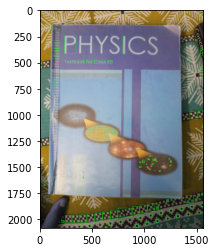

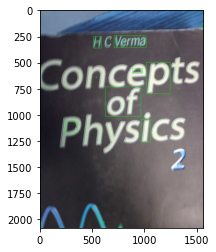

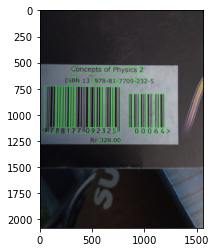

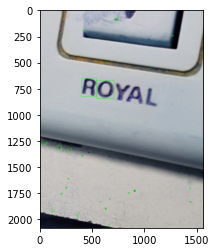

In [9]:
func(r'C:\Users\Utkarsh\Pictures\pic')